## **Rainfall Dataset Overview**  
### Dataset Link:*https://www.data.gov.in/resource/sub-divisional-monthly-rainfall-1901-2017*
### **Structure and Contents**  

The dataset contains historical rainfall data from **1916 to 2017**, covering multiple **subdivisions** across India. It provides monthly, seasonal, and annual rainfall records for each subdivision, allowing for trend analysis, anomaly detection, and regional comparisons.  

### **Columns in the Dataset:**  

1. **SUBDIVISION** – Name of the geographical region/subdivision.  
2. **YEAR** – The corresponding year of rainfall measurement.  
3. **Monthly Rainfall Columns (JAN - DEC)** – Rainfall (in mm) recorded for each month of the year.  
4. **ANNUAL** – Total rainfall received in the entire year.  
5. **Seasonal Aggregates:**  
   - **JF (Jan-Feb)**
   - **MAM (Mar-May)**
   - **JJAS (Jun-Sep, Monsoon Season)**
   - **OND (Oct-Dec, Post-Monsoon)**  
   


## **1. Data Preprocessing: Handling and Cleaning the Rainfall Dataset**



### **Steps Involved in Preprocessing**

In [1]:
import pandas as pd
import numpy as np

#### **1.1 Loading the Dataset**

The dataset is loaded using Pandas, which provides powerful functionalities for data manipulation. Checking the initial structure using `.info()` and `.head()` gives insights into missing values, data types, and an overall understanding of the dataset.

In [2]:
df = pd.read_csv("Rainfall_data.csv")  

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

None

In [4]:
display(df.head())

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
subdivision_counts = df["SUBDIVISION"].value_counts()
display(subdivision_counts)

SUBDIVISION
West Madhya Pradesh                   117
East Rajasthan                        117
Coastal Karnataka                     117
Tamil Nadu                            117
Rayalseema                            117
Telangana                             117
Coastal Andhra Pradesh                117
Chhattisgarh                          117
Vidarbha                              117
Matathwada                            117
Madhya Maharashtra                    117
Konkan & Goa                          117
Saurashtra & Kutch                    117
Gujarat Region                        117
East Madhya Pradesh                   117
Kerala                                117
West Rajasthan                        117
South Interior Karnataka              117
Jammu & Kashmir                       117
Himachal Pradesh                      117
Punjab                                117
Haryana Delhi & Chandigarh            117
Uttarakhand                           117
West Uttar Pradesh    

In [6]:
unique_subdivisions = df["SUBDIVISION"].unique()
display(unique_subdivisions)

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

#### **1.2 Handling Missing Values**

Missing values are common in real-world datasets and can arise due to various reasons, such as data collection issues, recording errors, or inconsistencies in measurements over the years.


We check for missing values using `df.isnull().sum()`


In [7]:
missing_values = df.isnull().sum()
display(missing_values)

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [8]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)  
    else:
        df[col].fillna(df[col].median(), inplace=True)  

In [9]:
month_cols = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

In [10]:
for col in month_cols:
    df[col] = df.groupby("SUBDIVISION")[col].transform(lambda x: x.fillna(x.mean()))

#### **1.3 Handling Outliers**



  Outliers can significantly impact statistical analysis and trend estimation. To detect outliers:



  We use statistical measures such as `Z-score` and `IQR (Interquartile Range)`.



  If any data points deviate significantly from the rest, they are flagged as potential outliers.



  Instead of removing them outright, we analyze them and replace extreme values with reasonable estimates if needed.


In [11]:
for col in month_cols + ["ANNUAL", "JF", "MAM", "JJAS", "OND"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, df[col], df[col])
    df[col] = np.where(df[col] > upper_bound, df[col], df[col])

In [12]:
display(df.head())

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [13]:
df.to_csv("Rainfall_post_processing.csv", index=False)

In [14]:
df = pd.read_csv('rainfall_data.csv')

#### **1.4 Handling Missing Rows**
Now we noticed that there are some rows missing.

In [15]:
df = df[(df["YEAR"] >= 1901) & (df["YEAR"] <= 2017)]

In [16]:
all_years = set(range(1901, 2018))

In [17]:
def find_missing_years(sub_df):
    present_years = set(sub_df["YEAR"])
    return sorted(list(all_years - present_years))

In [18]:
missing_years = df.groupby("SUBDIVISION").apply(find_missing_years)

In [19]:
for subdivision, years in missing_years.items():
    print(f"Subdivision: {subdivision}, Missing Years: {years}")

Subdivision: Andaman & Nicobar Islands, Missing Years: [1909, 1943, 1944, 1945, 1948]
Subdivision: Arunachal Pradesh, Missing Years: [1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1954, 1955, 1956]
Subdivision: Assam & Meghalaya, Missing Years: []
Subdivision: Bihar, Missing Years: []
Subdivision: Chhattisgarh, Missing Years: []
Subdivision: Coastal Andhra Pradesh, Missing Years: []
Subdivision: Coastal Karnataka, Missing Years: []
Subdivision: East Madhya Pradesh, Missing Years: []
Subdivision: East Rajasthan, Missing Years: []
Subdivision: East Uttar Pradesh, Missing Years: []
Subdivision: Gangetic West Bengal, Missing Years: []
Subdivision: Gujarat Region, Missing Years: []
Subdivision: Haryana Delhi & Chandigarh, Missing Years: []
Subdivision: Himachal Pradesh, Missing Years: []
Subdivision: Jammu & Kashmir, Missing Years: []
Subdivision: Jharkhand, Missing Years: []
Subdivision: Kerala, Missing Years: []
Subdivision: Konkan & Goa, Missin

In [20]:
missing_years_df = missing_years.reset_index()
missing_years_df.columns = ["SUBDIVISION", "MISSING_YEARS"]
missing_years_df.to_csv("missing_years_info.csv", index=False)
print("\nMissing year data saved as 'missing_years_info.csv'.")


Missing year data saved as 'missing_years_info.csv'.


In [21]:
df = pd.read_csv("Rainfall_post_processing.csv")

In [22]:
df = df.sort_values(by=["SUBDIVISION", "YEAR"]).reset_index(drop=True)

In [23]:
subdivision_missing_years = {
    "Andaman & Nicobar Islands": [1909, 1943, 1944, 1945, 1948],
    "Arunachal Pradesh": [1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1954, 1955, 1956],
    "Lakshadweep": [1918]
}
month_cols = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "ANNUAL", "JF", "MAM", "JJAS", "OND"]

##### To handle the missing rows, we use weighted average over the years for which the data is available giving more value to the years nearby. Also, later we add noise to maintain disuniformity.

In [ ]:
def weighted_moving_avg(values, weights):
    return np.average(values, weights=weights)

for sub, missing_years in subdivision_missing_years.items():
    sub_df = df[df["SUBDIVISION"] == sub]

    available_years = sub_df["YEAR"].values
    for year in missing_years:
        if len(available_years) == 0:
            continue  

        weights = np.exp(-0.1 * np.abs(available_years - year))
        weights /= weights.sum()

        weighted_avg_values = sub_df[month_cols].values.T @ weights

        noise = np.random.normal(loc=0, scale=0.1 * np.std(weighted_avg_values), size=weighted_avg_values.shape)
        weighted_avg_values += noise

        weighted_avg_values = np.round(weighted_avg_values, 1)

        new_row = pd.DataFrame([[sub, year] + list(weighted_avg_values)], columns=df.columns)
        df = pd.concat([df, new_row], ignore_index=True)

In [25]:
df = df.sort_values(by=["SUBDIVISION", "YEAR"]).reset_index(drop=True)

In [26]:
df.to_csv("rainfall_data_final.csv", index=False, float_format="%.1f")

## **2. Exploratory Data Analysis (EDA) on Rainfall Trends**


 In this step, we focus on:

- Understanding rainfall distribution over the years.
- Identifying long-term trends and seasonal variations.
- Examining how different subdivisions behave in terms of rainfall patterns.
- Using visualizations to gain insights before applying machine learning or statistical modeling.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy.fft import fft, fftfreq
import ipywidgets as widgets
from IPython.display import display

##  **Rainfall Trend Analysis by Subdivision**  

### **Process Followed:**  
1. **Data Loading:** The dataset containing rainfall records is read into a Pandas DataFrame.  
2. **Filtering by Subdivision:** The data is filtered to extract rainfall information for the selected subdivision.  
3. **Annual Rainfall Trend Plot:** A line plot is generated to show yearly variations in total rainfall.  
4. **Average Monthly Rainfall Plot:** A bar chart displays the mean rainfall for each month to observe seasonal patterns.  
5. **Interactive Selection:** A dropdown menu allows users to choose different subdivisions and view their respective trends.  

This visualization helps in identifying climate trends and seasonal rainfall distribution across regions.

In [28]:
df = pd.read_csv("rainfall_data_final.csv")

month_cols = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "ANNUAL"]

def plot_subdivision_trends(subdivision):
    sub_df = df[df["SUBDIVISION"] == subdivision]
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    axes[0].plot(sub_df["YEAR"], sub_df["ANNUAL"], marker="o", linestyle="-", label="Annual Rainfall")
    axes[0].set_title(f"Annual Rainfall Trend for {subdivision}")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Rainfall (mm)")
    axes[0].grid()
    axes[0].legend()
    
    avg_monthly = sub_df[month_cols[:-1]].mean()
    sns.barplot(x=avg_monthly.index, y=avg_monthly.values, ax=axes[1], color='skyblue')
    axes[1].set_title(f"Average Monthly Rainfall for {subdivision}")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Average Rainfall (mm)")
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

subdivision_dropdown = widgets.Dropdown(
    options=df["SUBDIVISION"].unique(),
    description="Subdivision:",
    style={'description_width': 'initial'}
)

display(subdivision_dropdown)
widgets.interactive(plot_subdivision_trends, subdivision=subdivision_dropdown)


Dropdown(description='Subdivision:', options=('Andaman & Nicobar Islands', 'Arunachal Pradesh', 'Assam & Megha…

interactive(children=(Dropdown(description='Subdivision:', options=('Andaman & Nicobar Islands', 'Arunachal Pr…

In [29]:
month_cols = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", "ANNUAL"]


**Annual Rainfall Distribution:**  
   - A histogram is plotted with a KDE (Kernel Density Estimate) overlay.  
   - This helps visualize the overall distribution and spread of annual rainfall across all records.  



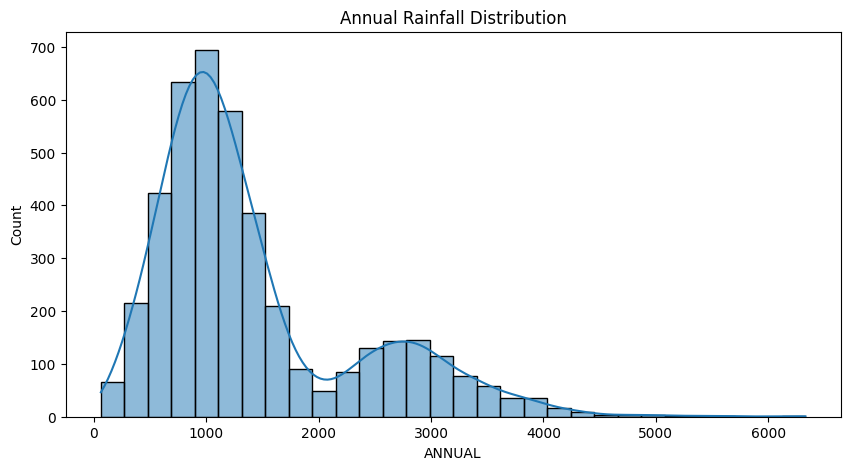

In [30]:
plt.figure(figsize=(10, 5))
sns.histplot(df["ANNUAL"], kde=True, bins=30)
plt.title("Annual Rainfall Distribution")
plt.show()

2. **Rainfall Variability Across Subdivisions:**  
   - A boxplot is used to compare annual rainfall across different subdivisions.  
   - It highlights variations, outliers, and median rainfall values for each region.  


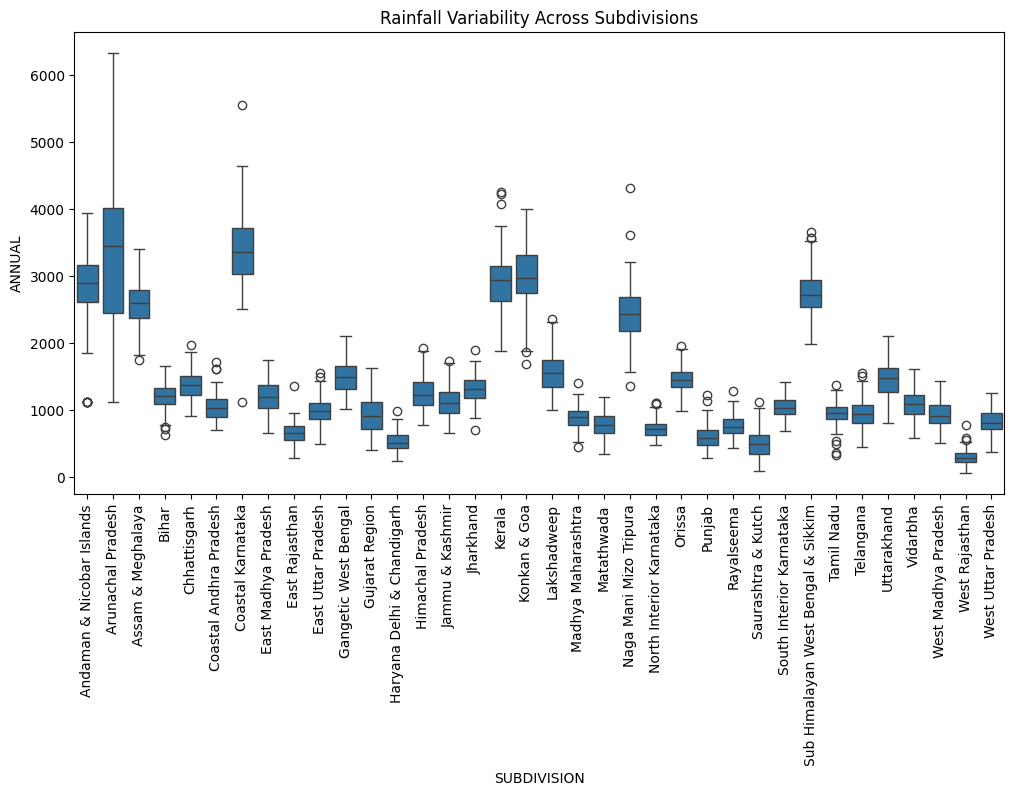

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df)
plt.xticks(rotation=90)
plt.title("Rainfall Variability Across Subdivisions")
plt.show()


**Annual Rainfall Trends:**  
   - Line plots for each subdivision are generated to observe long-term variations in annual rainfall.  
   - This helps identify regions with increasing or decreasing rainfall patterns over time.  


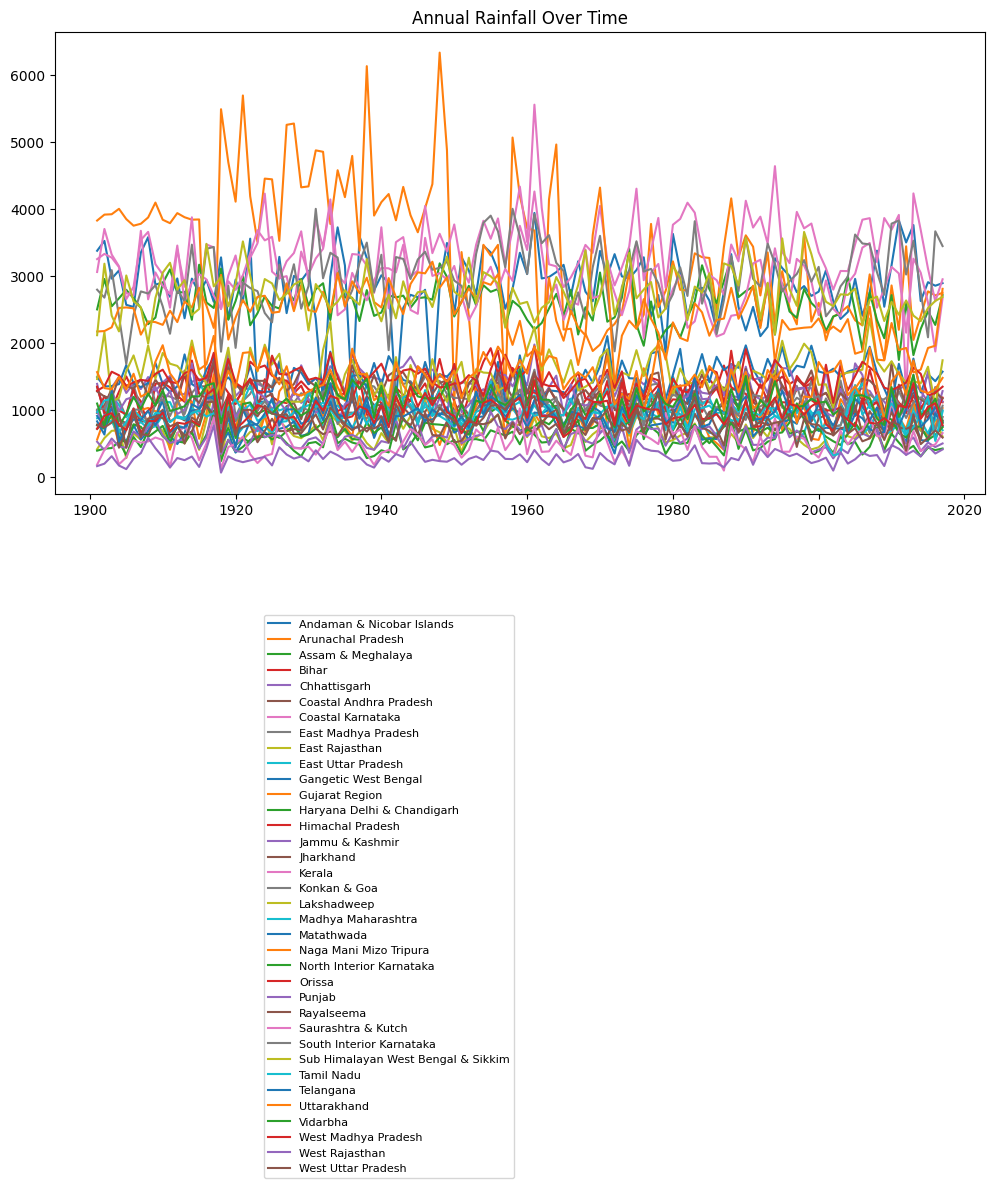

In [32]:
plt.figure(figsize=(12, 6))
for sub in df["SUBDIVISION"].unique():
    sub_df = df[df["SUBDIVISION"] == sub]
    plt.plot(sub_df["YEAR"], sub_df["ANNUAL"], label=sub)
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.25), fontsize=8)
plt.title("Annual Rainfall Over Time")
plt.show()


**5-Year Moving Average Analysis:**  
   - A rolling mean with a 5-year window is applied to smooth out short-term fluctuations.  
   - The moving average trends provide a clearer picture of long-term climatic shifts in different subdivisions.  



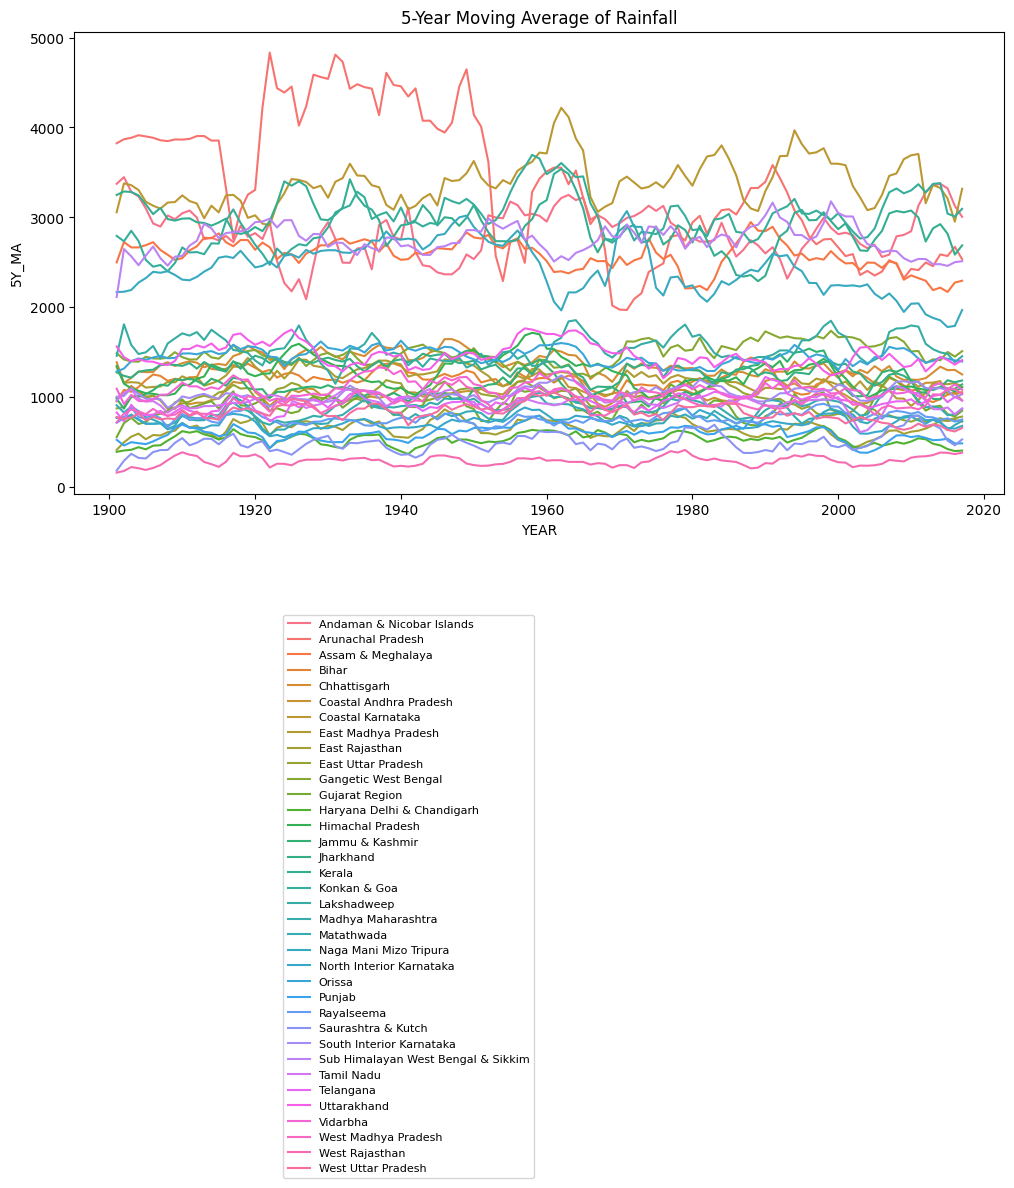

In [33]:
df["5Y_MA"] = df.groupby("SUBDIVISION")["ANNUAL"].transform(lambda x: x.rolling(5, min_periods=1).mean())
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["YEAR"], y=df["5Y_MA"], hue=df["SUBDIVISION"])
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.25), fontsize=8)
plt.title("5-Year Moving Average of Rainfall")
plt.show()


 **Seasonal Decomposition:**  
   - The time series decomposition technique is applied to break down annual rainfall into trend, seasonality, and residuals.  
   - This helps in identifying periodic fluctuations and long-term trends.  



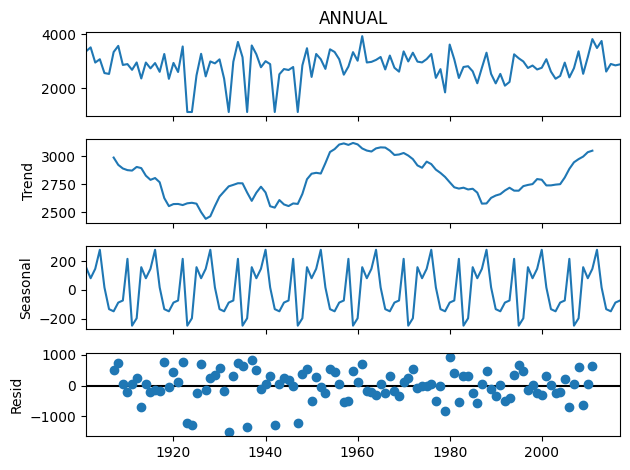

In [34]:
sub_df = df[df["SUBDIVISION"] == "Andaman & Nicobar Islands"]
decompose_result = seasonal_decompose(sub_df.set_index("YEAR")["ANNUAL"], model='additive', period=12)
decompose_result.plot()
plt.show()

 **Correlation Heatmap:**  
   - A heatmap of monthly rainfall correlations is generated to analyze how different months are related.  
   - Strong correlations indicate seasonal dependencies in rainfall distribution.  


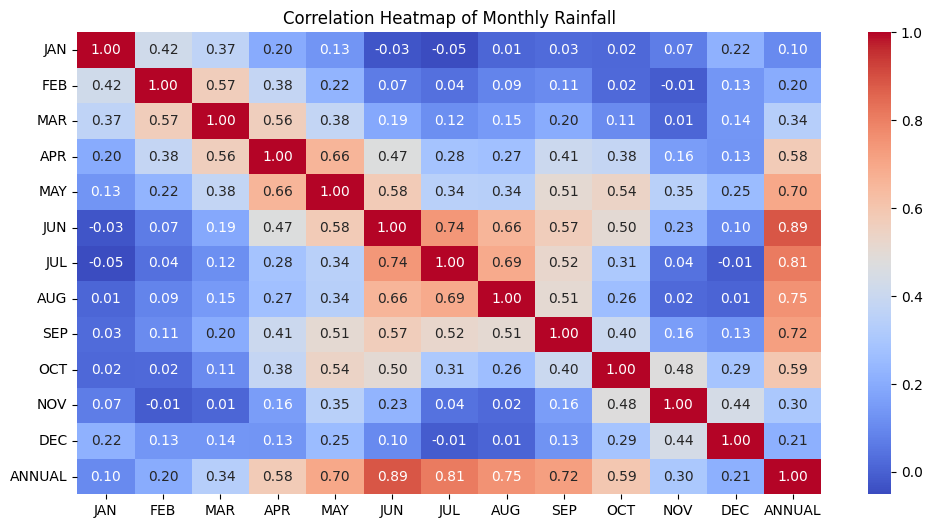

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[month_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Monthly Rainfall")
plt.show()


 **Identifying Drought Years:**  
   - The 10 years with the lowest annual rainfall are extracted to highlight severe drought events.  
   - This provides insights into historical drought occurrences and affected regions.

In [36]:
drought_years = df.nsmallest(10, "ANNUAL")[["YEAR", "SUBDIVISION", "ANNUAL"]]
print("Top 10 Drought Years:\n", drought_years)

Top 10 Drought Years:
       YEAR         SUBDIVISION  ANNUAL
3995  1918      West Rajasthan    62.3
4079  2002      West Rajasthan    92.4
3128  1987  Saurashtra & Kutch    92.7
3982  1905      West Rajasthan   114.4
3059  1918  Saurashtra & Kutch   117.6
4046  1969      West Rajasthan   119.0
4016  1939      West Rajasthan   137.4
3988  1911      West Rajasthan   138.8
3052  1911  Saurashtra & Kutch   140.4
4045  1968      West Rajasthan   142.2



 **Finding Wettest Years:**  
   - The dataset is analyzed to extract the 10 years with the highest annual rainfall.  
   - This helps in understanding extreme rainfall events and their geographical distribution.  


In [37]:
wet_years = df.nlargest(10, "ANNUAL")[["YEAR", "SUBDIVISION", "ANNUAL"]]
print("Top 10 Wettest Years:\n", wet_years)

Top 10 Wettest Years:
      YEAR        SUBDIVISION  ANNUAL
164  1948  Arunachal Pradesh  6331.1
154  1938  Arunachal Pradesh  6129.0
137  1921  Arunachal Pradesh  5691.4
762  1961  Coastal Karnataka  5553.9
134  1918  Arunachal Pradesh  5486.3
144  1928  Arunachal Pradesh  5272.7
143  1927  Arunachal Pradesh  5253.2
174  1958  Arunachal Pradesh  5063.5
180  1964  Arunachal Pradesh  4959.3
165  1949  Arunachal Pradesh  4874.7


 **Decadal Trend Analysis:**  
   - Grouped data by decade and computed the mean annual rainfall for each.  
   - Plotted a trend to observe long-term patterns in rainfall.  



C:\Users\PRAKHAR\AppData\Local\Temp\ipykernel_21224\3424617262.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="DECADE", y="ANNUAL", data=df, ci=None, estimator=np.mean, marker="o")


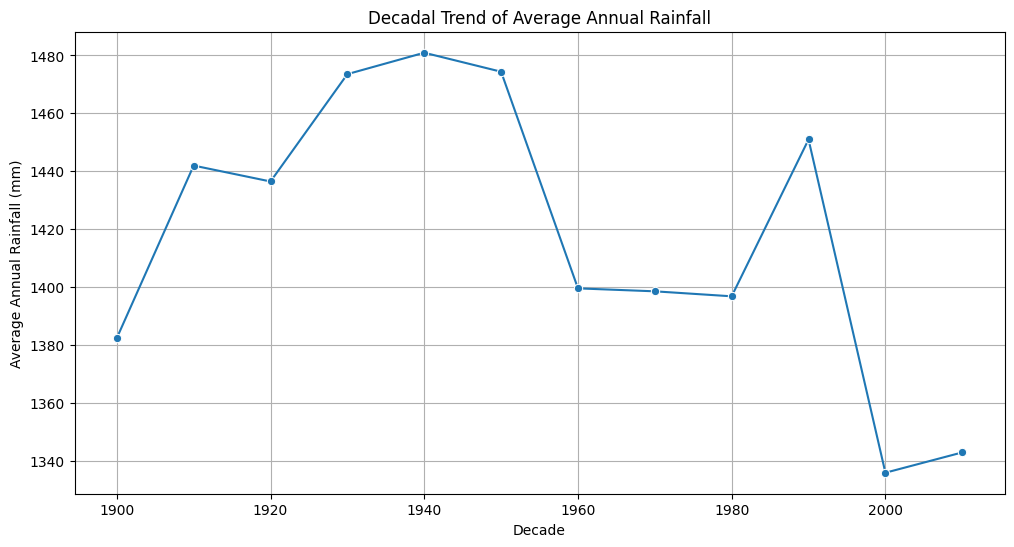

In [39]:
df["DECADE"] = (df["YEAR"] // 10) * 10
plt.figure(figsize=(12, 6))
sns.lineplot(x="DECADE", y="ANNUAL", data=df, ci=None, estimator=np.mean, marker="o")
plt.title("Decadal Trend of Average Annual Rainfall")
plt.xlabel("Decade")
plt.ylabel("Average Annual Rainfall (mm)")
plt.grid()
plt.show()

 **Monthly Rainfall Variability:**  
   - Used a boxplot to visualize the spread of monthly rainfall across years.  
   - Helps in identifying months with high variability in precipitation.  


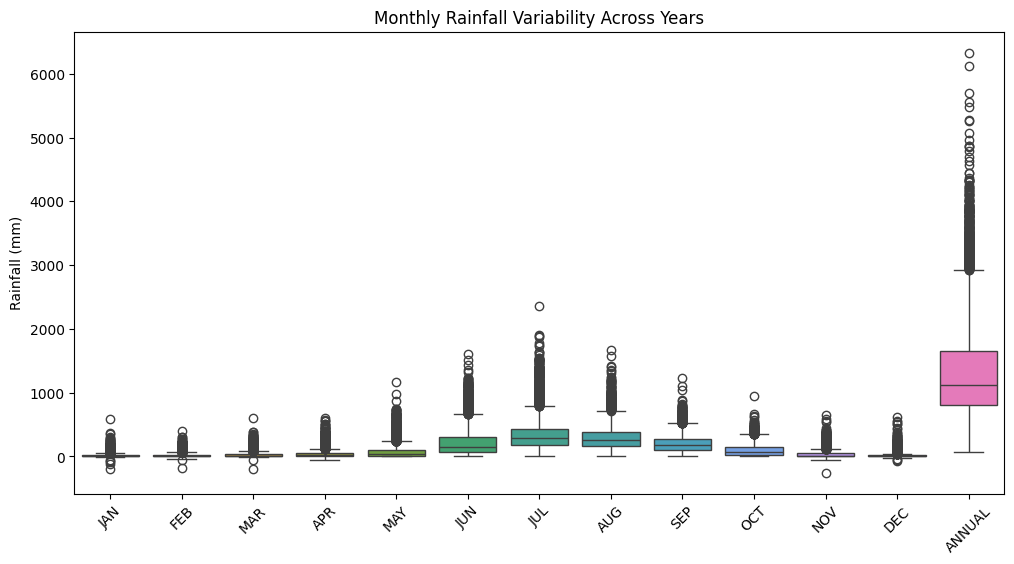

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[month_cols])
plt.xticks(rotation=45)
plt.title("Monthly Rainfall Variability Across Years")
plt.ylabel("Rainfall (mm)")
plt.show()


 **Rainfall Anomalies (Z-Score Analysis):**  
   - Standardized annual rainfall using Z-scores to detect extreme wet and dry years.  
   - Plotted with reference lines at ±2 to highlight significant deviations from the mean.  


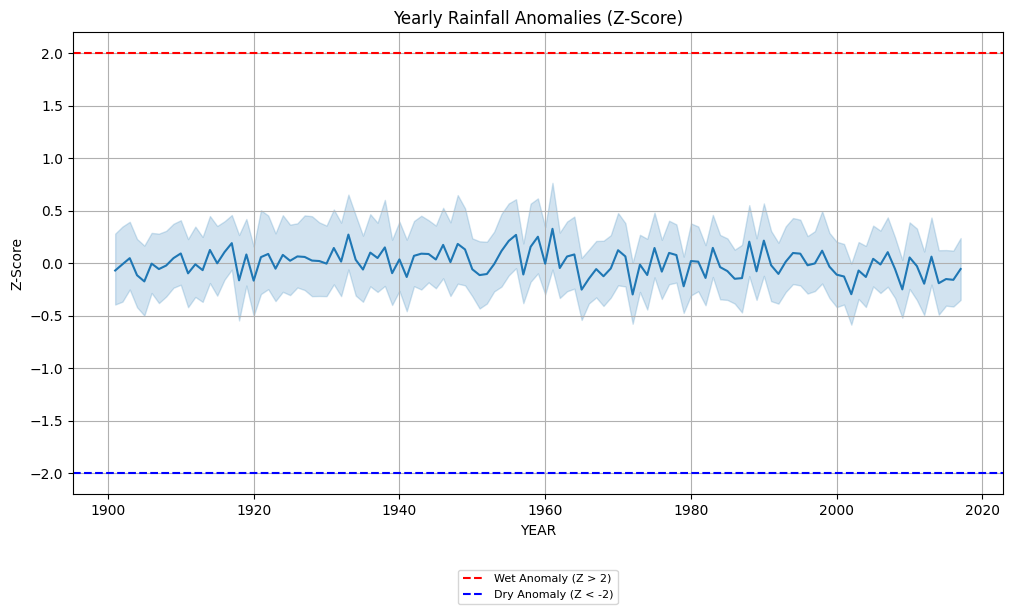

In [41]:
df["Z_SCORE"] = (df["ANNUAL"] - df["ANNUAL"].mean()) / df["ANNUAL"].std()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["YEAR"], y=df["Z_SCORE"])
plt.axhline(2, color="r", linestyle="--", label="Wet Anomaly (Z > 2)")
plt.axhline(-2, color="b", linestyle="--", label="Dry Anomaly (Z < -2)")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.25), fontsize=8)
plt.title("Yearly Rainfall Anomalies (Z-Score)")
plt.ylabel("Z-Score")
plt.grid()
plt.show()


 **Subdivision-wise Average Rainfall:**  
   - Calculated the average annual rainfall for each subdivision.  
   - Bar chart representation allows easy comparison of rainfall across different regions.

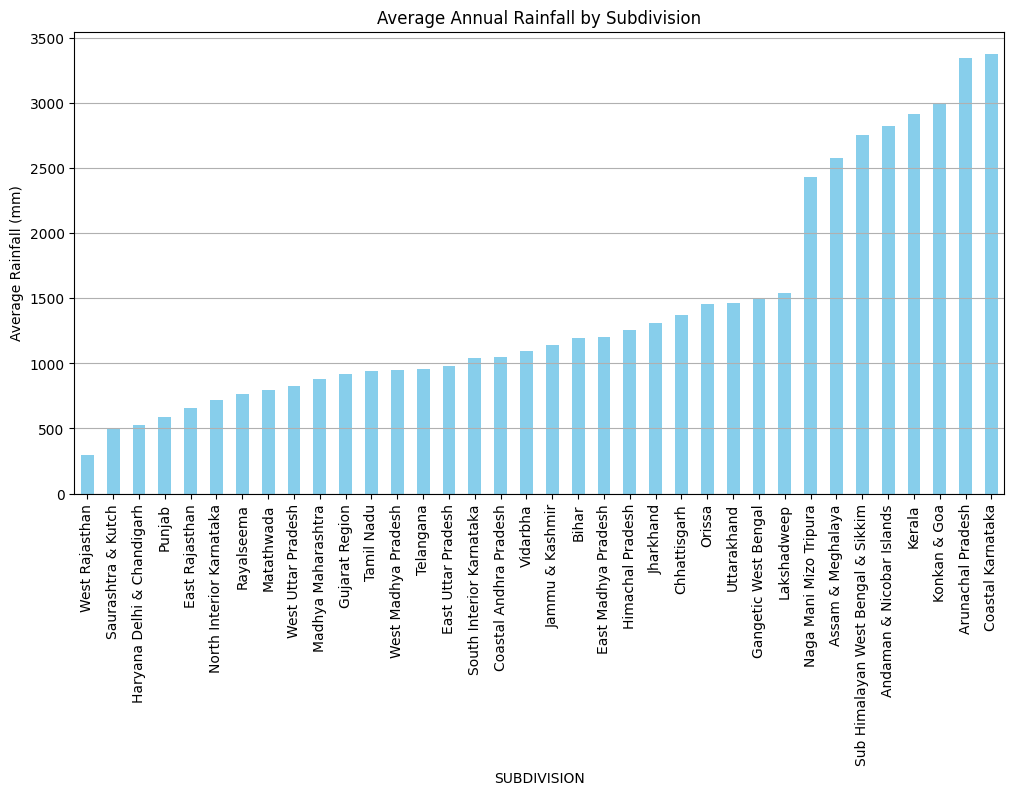

In [42]:
plt.figure(figsize=(12, 6))
df.groupby("SUBDIVISION")["ANNUAL"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.xticks(rotation=90)
plt.title("Average Annual Rainfall by Subdivision")
plt.ylabel("Average Rainfall (mm)")
plt.grid(axis="y")
plt.show()

In [44]:
print("EDA Completed Successfully!")

EDA Completed Successfully!
